In [96]:
from PIL import Image
import os
from ultralytics import YOLO
import cv2
import numpy as np
from skimage import io


def center_crop_images(input_folder, output_folder, crop_size=(512, 512)):
    # 创建输出文件夹
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # 加载预训练模型
    model = YOLO(model=model_path, task='detect')

    # 遍历输入文件夹中的图片
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)
        # 检测图片
        results = model(input_path)
        # 图片信息
        image = io.imread(input_path)
        # 坐标
        a, b, c, d = results[0].boxes.xyxy[0].reshape(1, 4).cpu().numpy().flatten().astype(np.int64)
        k1, k2,_ = image.shape
        k1, k2 = k1 // 2, k2 // 2
        # io.imread(input_path)[b:d, a:c]
        # 计算中心坐标
        center_x, center_y = (a + c) // 2, (b + d) // 2
        center_x, center_y = (center_x + k2) // 2, (center_y + k1) // 2
        # 计算扩展后的剪裁区域
        left = max(0, center_x - crop_size[0] // 2)
        top = max(0, center_y - crop_size[1] // 2)
        right = min(image.shape[1], center_x + crop_size[0] // 2)
        bottom = min(image.shape[0], center_y + crop_size[1] // 2)

        # 计算空间牺牲的量
        space_sacrificed_x = max(0, crop_size[0] // 2 - (center_x - left))
        space_sacrificed_y = max(0, crop_size[1] // 2 - (center_y - top))

        # 调整剪裁区域
        left = max(0, left - space_sacrificed_x)
        top = max(0, top - space_sacrificed_y)
        right = min(image.shape[1], right + space_sacrificed_x)
        bottom = min(image.shape[0], bottom + space_sacrificed_y)

        # 将图像中心剪裁为指定尺寸
        cropped_img = image[top:bottom, left:right]

        # 构造输出文件路径
        output_path = os.path.join(output_folder, filename)

        # 保存剪裁后的图片
        io.imsave(output_path, cropped_img)


# 输入和输出文件夹的路径
input_folder_path = "./me"
output_folder_path = "./me_r"

# 执行剪裁
center_crop_images(input_folder_path, output_folder_path)



image 1/1 C:\Users\Administrator\Desktop\Dreambooth-Stable-Diffusion-main\image\me\微信图片_20240124153049.jpg: 640x480 1 person, 1 bottle, 25.9ms
Speed: 1.0ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 C:\Users\Administrator\Desktop\Dreambooth-Stable-Diffusion-main\image\me\微信图片_20240124153102.jpg: 640x480 1 person, 26.9ms
Speed: 2.0ms preprocess, 26.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 C:\Users\Administrator\Desktop\Dreambooth-Stable-Diffusion-main\image\me\微信图片_20240124153110.jpg: 640x640 1 person, 31.9ms
Speed: 2.0ms preprocess, 31.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\Administrator\Desktop\Dreambooth-Stable-Diffusion-main\image\me\微信图片_20240124153114.jpg: 480x640 1 person, 2 clocks, 24.9ms
Speed: 1.0ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 C:\Users\Administrator\Desktop\Dreambooth-Sta

In [3]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO(r"C:\Users\Administrator\Downloads\yolov8x.pt")





image 1/1 C:\Users\Administrator\Desktop\Dreambooth-Stable-Diffusion-main\image\me\微信图片_20240124153114.jpg: 480x640 1 person, 2 clocks, 72.8ms
Speed: 3.0ms preprocess, 72.8ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)


In [59]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model_path = r"C:\Users\Administrator\Downloads\yolov8x.pt"
model = YOLO(model_path)

# Run inference on an image
# Define path to the image file
source = r"C:\Users\Administrator\Desktop\Dreambooth-Stable-Diffusion-main\image\me\微信图片_20240124153114.jpg"

results = model(source)  # results list

print(len(results))
boxes = results[0].boxes
for box in boxes:
    print(box.xyxy)
box = boxes[1]


image 1/1 C:\Users\Administrator\Desktop\Dreambooth-Stable-Diffusion-main\image\me\微信图片_20240124153114.jpg: 480x640 1 person, 2 clocks, 30.9ms
Speed: 2.0ms preprocess, 30.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
1
tensor([[ 375.6366,  236.8795,  864.4114, 1078.7715]], device='cuda:0')
tensor([[548.9757, 350.1508, 615.6734, 409.7839]], device='cuda:0')
tensor([[622.2453, 343.9909, 685.7515, 401.1166]], device='cuda:0')


In [54]:
box.xyxy

tensor([[548.9757, 350.1508, 615.6734, 409.7839]], device='cuda:0')


image 1/1 C:\Users\Administrator\Desktop\Dreambooth-Stable-Diffusion-main\image\me\微信图片_20240124153114.jpg: 480x640 1 person, 2 clocks, 26.9ms
Speed: 1.0ms preprocess, 26.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


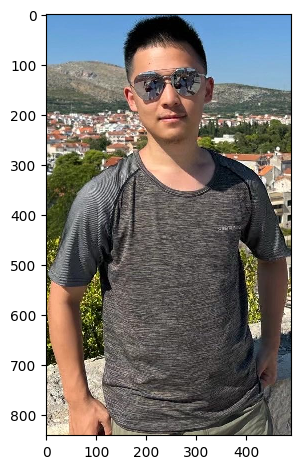

In [91]:
from ultralytics import YOLO
import cv2
import numpy as np
from skimage import io

# 加载预训练模型
model = YOLO(model=model_path, task='detect')
# model = YOLO("yolov8n.pt") task参数也可以不填写，它会根据模型去识别相应任务类别
# 检测图片
results = model(source)
# res = results[0].plot()

a, b, c, d = results[0].boxes.xyxy.reshape(3, 2, 2)[0].cpu().numpy().flatten().astype(np.int64)
a, b, c, d

io.imshow(io.imread(source)[b:d, a:c])



In [77]:
# k1, k2, _ = io.imread(source).shape
# k1, k2

(1080, 1440)

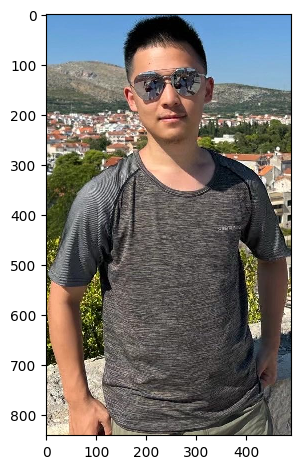

In [90]:
a, b, c, d = results[0].boxes.xyxy.reshape(3, 2, 2)[0].cpu().numpy().flatten().astype(np.int64)
a, b, c, d
import numpy as np
from skimage import io

io.imshow(io.imread(source)[b:d, a:c])

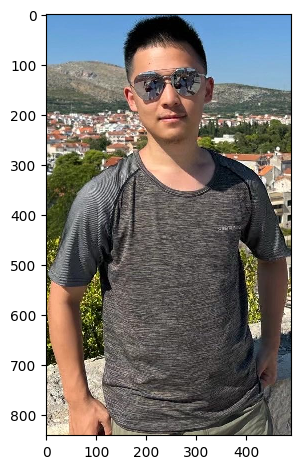

In [ ]:
box.xyxy  # box coordinates (tensor)
box.cls.item()  # class id
box.conf.item()  # confidence value